In [1]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import game
import model

pygame 2.0.1 (SDL 2.0.14, Python 3.8.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
board_size = 8
output_size = 4
hidden_nodes = 16
learning_rate = 1e-3
maximum_discount = .9
random_action_threshold = 0.1
game_max_length = 2000
num_episodes = 1000
save_interval = 100

In [3]:
env = game.Game(board_size)
rlModel = model.RLModel(nodes=[board_size ** 2 * 3, hidden_nodes, output_size], learning_rate=learning_rate)

In [4]:
jList = []
rList = []
for i in range(num_episodes):
    s = env.clear_board()
    rAll = 0
    d = False
    j = 0
    while j < game_max_length:
        j+=1
        s = env.get_board()
        a = np.argmax(rlModel.predict(s)[0])
        if np.random.rand(1) < random_action_threshold:
            a = env.random_action()
        s1, reward, done = env.step(a)
        rlModel.train_single_step(s, s1, a, reward, maximum_discount)
        rAll += reward
        if done:
            break
        random_action_threshold = 1./((i/50) + 10)
    if i % save_interval == 0 and i > 0:
        print('Done {}/{} {:.2f}% Last game length: {}, Average game length: {}, Average length in last {}: {}, average R in last {}: {}'.format(i, num_episodes, i/num_episodes*100,j, sum(jList)/i, save_interval, sum(jList[-save_interval:])/save_interval, save_interval, sum(rList[-save_interval:])/save_interval))
        rlModel.saveVariables()
    jList.append(j)
    rList.append(rAll)
print("Average R: " + str(sum(rList)/num_episodes))
print("Average lenght: " + str(sum(jList)/num_episodes))

Done 100/500 20.00% Last game length: 14, Average game length: 9.74, Average length in last 100: 9.74, average R in last 100: -53.63
Done 200/500 40.00% Last game length: 15, Average game length: 12.29, Average length in last 100: 14.84, average R in last 100: -54.88
Done 300/500 60.00% Last game length: 61, Average game length: 16.366666666666667, Average length in last 100: 24.52, average R in last 100: -59.43
Done 400/500 80.00% Last game length: 25, Average game length: 18.6075, Average length in last 100: 25.33, average R in last 100: -58.8
Average R: -56.472
Average lenght: 18.968


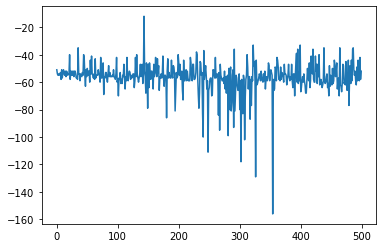

In [5]:
plt.plot(rList)

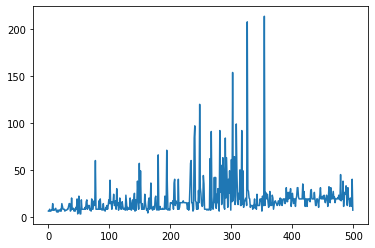

In [6]:
plt.plot(jList)